# State of the Union

## Word Usage with *tm*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
# If you are using the jupyter/datascience-notebook docker image to run the notebooks in this repository,
# open a terminal window and run this first:
#
#   conda install r-tm

library(tm)

options(stringsAsFactors = FALSE)

Loading required package: NLP



## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
docs_df <- data.frame(doc_id=d$Speech, text=d$Text, d[, c("President", "Term", "Year")])

In [4]:
docs_ds <- DataframeSource(docs_df)

In [5]:
docs_c <- SimpleCorpus(docs_ds)
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 41

In [6]:
getTransformations()

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

In [7]:
docs_c <- tm_map(docs_c, removeNumbers)
docs_c <- tm_map(docs_c, removePunctuation)
docs_c <- tm_map(docs_c, stripWhitespace)
docs_c <- tm_map(docs_c, content_transformer(tolower))
docs_c <- tm_map(docs_c, removeWords, c(stopwords(), "applause"))
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 41

In [8]:
docs_dtm <- DocumentTermMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_dtm)

Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
“custom functions are ignored”


<<DocumentTermMatrix (documents: 41, terms: 11317)>>
Non-/sparse entries: 55413/408584
Sparsity           : 88%
Maximal term length: 32
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
             Terms
Docs            hussein         iraq       iraqi         must      propose
  1981 Reagan 0.0000000 0.0000000000 0.000000000 0.0006561534 0.0003565584
  1986 Reagan 0.0000000 0.0000000000 0.000000000 0.0011026286 0.0000000000
  1987 Reagan 0.0000000 0.0000000000 0.000000000 0.0006756517 0.0008566924
  1988 Reagan 0.0000000 0.0000000000 0.000000000 0.0003855492 0.0000000000
  2003 GWBush 0.0199298 0.0035785208 0.004591169 0.0006818386 0.0011527160
  2007 GWBush 0.0000000 0.0057098493 0.006540732 0.0006799589 0.0005747692
  2017 Trump  0.0000000 0.0000000000 0.000000000 0.0008220809 0.0000000000
  2018 Trump  0.0000000 0.0003334269 0.000000000 0.0002470610 0.0000000000
  2019 Trump  0.0000000 0.0006698732 0.000000000 0.0006736304 

In [9]:
docs_tdm <- TermDocumentMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_tdm)

Warning message in TermDocumentMatrix.SimpleCorpus(docs_c, control = list(weighting = weightTfIdf)):
“custom functions are ignored”


<<TermDocumentMatrix (terms: 11317, documents: 41)>>
Non-/sparse entries: 55413/408584
Sparsity           : 88%
Maximal term length: 32
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
           Docs
Terms        1981 Reagan 1986 Reagan  1987 Reagan  1988 Reagan  2003 GWBush
  hussein   0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0199298045
  iraq      0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0035785208
  iraqi     0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0045911689
  must      0.0006561534 0.001102629 0.0006756517 0.0003855492 0.0006818386
  propose   0.0003565584 0.000000000 0.0008566924 0.0000000000 0.0011527160
  reduction 0.0046393243 0.000000000 0.0023885933 0.0030289118 0.0000000000
  saddam    0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0182029028
  soviet    0.0005430052 0.002689442 0.0065233136 0.0009926449 0.0004388698
  terror    0.0000000000 0.001762241 0.0000000000 0.0008

In [10]:
# Find the terms with the highest tf-idf, that is most unique to their speech.

findFreqTerms(docs_tdm, lowfreq = 0.02)

[1] "companies"  "industry"   "inflation"  "must"       "oil"       
 [6] "propose"    "recovery"   "reduction"  "soviet"     "space"     
[11] "thats"      "welfare"    "regime"     "college"    "usa"       
[16] "revolution" "terrorists" "drugs"      "terror"     "kids"      
[21] "terrorist"  "border"     "hussein"    "iraq"       "saddam"    
[26] "iraqi"      "gun"        "qaida"      "iraqis"

## Visualizations

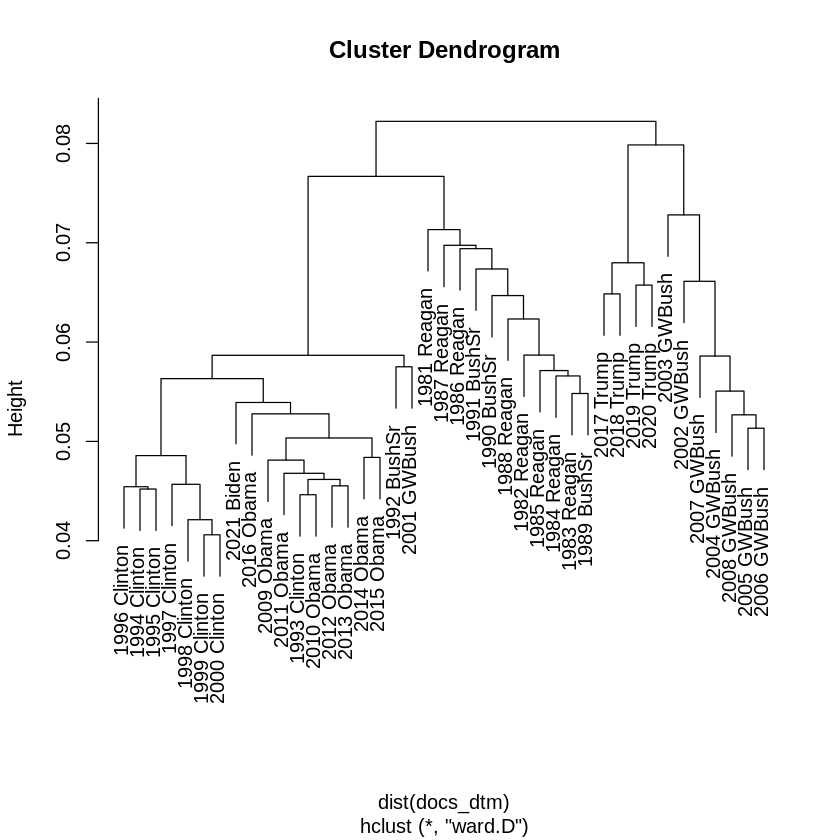

In [11]:
plot(hclust(dist(docs_dtm), method = "ward.D"))